Importing the tensorflow_datasets library.

In [1]:
from tensorflow.keras import datasets, layers, models, preprocessing
from keras.src.utils import to_categorical
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2

Loading in the stanford_dogs dataset, and splitting into train and test dataset. Train and Test dataset has images and labels.

In [2]:
dataset, metadata = tfds.load('stanford_dogs', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# trainData = list(train_dataset.as_numpy_iterator())
# print(trainData)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


Extracting metadata information: class names, number of training and test data.

In [3]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
class_names = metadata.features['label'].names


# print(training_labels)
print(num_train_examples)
print(num_test_examples)
print(class_names)

12000
8580
['n02085620-chihuahua', 'n02085782-japanese_spaniel', 'n02085936-maltese_dog', 'n02086079-pekinese', 'n02086240-shih-tzu', 'n02086646-blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-rhodesian_ridgeback', 'n02088094-afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-walker_hound', 'n02089973-english_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-irish_wolfhound', 'n02091032-italian_greyhound', 'n02091134-whippet', 'n02091244-ibizan_hound', 'n02091467-norwegian_elkhound', 'n02091635-otterhound', 'n02091831-saluki', 'n02092002-scottish_deerhound', 'n02092339-weimaraner', 'n02093256-staffordshire_bullterrier', 'n02093428-american_staffordshire_terrier', 'n02093647-bedlington_terrier', 'n02093754-border_terrier', 'n02093859-kerry_blue_terrier', 'n02093991-irish_terrier', 'n02094114-norfolk_terrier', 'n02094258-norwich_terrier', 'n02094433-

In [4]:
#Helper function extracting images, and labels, and resizing images, then returning list of labels and images.
def extractData(dataset):
    image_list = []
    label_list = []

    for batch_data in dataset.batch(batch_size=1).as_numpy_iterator():
        image, label = batch_data
        img = cv2.resize(image[0], target_shape, interpolation=cv2.INTER_AREA)
        image_list.append(img)
        label_list.append(label[0])

    return (image_list, label_list)

# Convert the lists to NumPy arrays
target_shape = (100, 100)
training_images_array, training_labels_array = extractData(train_dataset)
testing_images_array, testing_labels_array = extractData(test_dataset)

Converting to nparrays. Finding Mean and Standard Deviation, and then normalizing training and testing image arrays.

In [5]:
training_images_array, testing_images_array = np.array(training_images_array), np.array(testing_images_array)

# Calculating means and standard deviations for each feature.
train_mean, train_std = np.mean(training_images_array), np.std(training_images_array)
test_mean, test_std = np.mean(testing_images_array), np.std(testing_images_array)

# Normalizing. I add epsilon incase std is exactly 0.
epsilon = 0.0001
training_norm_data = (training_images_array - train_mean) / (train_std + epsilon)
testing_norm_data = (testing_images_array - test_mean) / (test_std + epsilon)

Splitting Testing images and labels into validation and test set. Converting labels lists into numpy arrays.

In [ ]:
# training_labels_array, testing_labels_array = np.array(training_labels_array), np.array(testing_labels_array)
print(training_norm_data.shape)
print(testing_norm_data.shape)
extra_training, extra_training_labels = testing_norm_data[:3000], testing_labels_array[:3000]
print(extra_training.shape, extra_training_labels.shape)
# test = np.concatenate((training_images_array, extra_training), axis=0)
# print(test.shape)
valarray, valabels = testing_norm_data[7000:], testing_labels_array[7000:]
test2 = print(valarray.shape, valabels.shape)


(12000, 64, 64, 3)
(8580, 64, 64, 3)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
training_labels_array, testing_labels_array = np.array(training_labels_array), np.array(testing_labels_array)

#I wanted to add an extra 3000 images for training, so I removed these from validation, and added them to testing.
#I give 3000 images for validation, and around 1500 images for testing.

extra_training, extra_training_labels = testing_norm_data[:3000], testing_labels_array[:3000]
training_norm_data = np.concatenate((training_norm_data, extra_training), axis=0)
training_labels_array = np.concatenate((training_labels_array, extra_training_labels), axis=0)

print(training_norm_data.shape)
validation_images_array, validation_labels_array = testing_norm_data[3000:7000], testing_labels_array[3000:7000]
testing_norm_data, testing_labels_array = testing_norm_data[7000:], testing_labels_array[7000:]

(15000, 100, 100, 3)


Displaying some test images with labels.

(100, 100, 3)
(4000, 100, 100, 3)


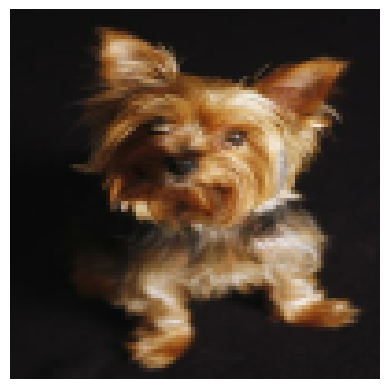

n02094433-yorkshire_terrier


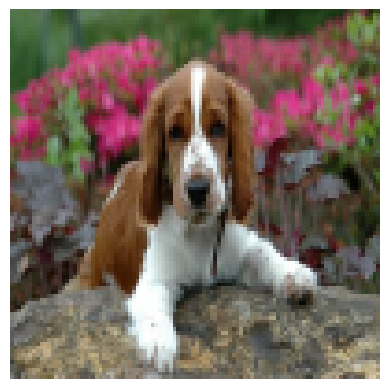

n02107683-bernese_mountain_dog


In [ ]:
def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

image = training_images_array[0]
print(image.shape)

print(validation_images_array.shape)

image_test = testing_images_array[0]

# Comparing Training images and label list.
display_image(image)
print(class_names[training_labels_array[0]])

#Comparing testing images and label list
display_image(image_test)
print(class_names[testing_labels_array[0]])

Training the Model.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(120, activation='softmax'))

Model Fitting and Compiling

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_norm_data, training_labels_array, epochs=10, validation_data=(validation_images_array, validation_labels_array))

Epoch 1/10
469/469 [==============================] - 104s 220ms/step - loss: 4.5860 - accuracy: 0.0264 - val_loss: 4.3961 - val_accuracy: 0.0395
Epoch 2/10
469/469 [==============================] - 106s 226ms/step - loss: 4.2705 - accuracy: 0.0557 - val_loss: 4.2236 - val_accuracy: 0.0597
Epoch 3/10
469/469 [==============================] - 107s 227ms/step - loss: 3.9494 - accuracy: 0.1003 - val_loss: 4.1374 - val_accuracy: 0.0798
Epoch 4/10
469/469 [==============================] - 106s 226ms/step - loss: 3.3721 - accuracy: 0.2013 - val_loss: 4.3288 - val_accuracy: 0.0805
Epoch 5/10
469/469 [==============================] - 107s 227ms/step - loss: 2.3320 - accuracy: 0.4109 - val_loss: 5.0969 - val_accuracy: 0.0742
Epoch 6/10
469/469 [==============================] - 105s 225ms/step - loss: 1.1889 - accuracy: 0.6842 - val_loss: 7.1185 - val_accuracy: 0.0710
Epoch 7/10
469/469 [==============================] - 111s 236ms/step - loss: 0.5280 - accuracy: 0.8594 - val_loss: 9.2577 -

KeyboardInterrupt: 

Converting the testing and validation labels to categorical (one-hot encoded) data. Implementing the generator method to reduce overfitting.

In [ ]:
# Converting Labels to one-hot:
training_categorical = to_categorical(training_labels_array)
print(type(training_categorical.shape))
print(training_labels_array.shape)
validation_categorical = to_categorical(validation_labels_array)
print(validation_categorical.shape)

# Creating the train_generator
train_datagen = preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
train_generator = train_datagen.flow(training_norm_data, training_labels_array, batch_size=32)

<class 'tuple'>
(15000,)
(4000, 120)


Building the new Model.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(100, 100, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(120))
model.add(layers.Activation('sigmoid'))

Compiling and Running the Model.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#now we can fit the model
model.fit(train_generator, epochs=50, validation_data=(validation_images_array, validation_labels_array))
model.save

Epoch 1/50
469/469 [==============================] - 293s 615ms/step - loss: 4.7591 - accuracy: 0.0113 - val_loss: 4.6645 - val_accuracy: 0.0230
Epoch 2/50
469/469 [==============================] - 282s 601ms/step - loss: 4.6297 - accuracy: 0.0198 - val_loss: 4.5402 - val_accuracy: 0.0280
Epoch 3/50
469/469 [==============================] - 281s 598ms/step - loss: 4.5436 - accuracy: 0.0255 - val_loss: 4.4473 - val_accuracy: 0.0388
Epoch 4/50
469/469 [==============================] - 286s 610ms/step - loss: 4.4766 - accuracy: 0.0292 - val_loss: 4.3858 - val_accuracy: 0.0362
Epoch 5/50
 19/469 [>.............................] - ETA: 4:24 - loss: 4.4342 - accuracy: 0.0263

KeyboardInterrupt: 